In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [124]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [125]:
X_train.shape

(60000, 28, 28)

In [126]:
X_test.shape

(10000, 28, 28)

In [127]:
def show_image(train, label, img):
    number = label[img]
    print(f'NUMBER is: {number}')
    plt.imshow(train[img])

NUMBER is: 1


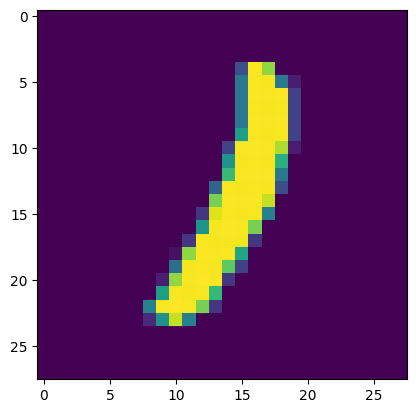

In [128]:
show_image(X_train, y_train, 78)

In [129]:
np.min(y_train)

0

In [130]:
np.max(y_train)

9

In [131]:
X_train = X_train / 255
X_test = X_test/ 255

In [132]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [133]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [134]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1222 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0507 - accuracy: 0.9843


In [135]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 775us/step - loss: 0.0783 - accuracy: 0.9751


[0.07834663987159729, 0.9750999808311462]

NUMBER is: 7


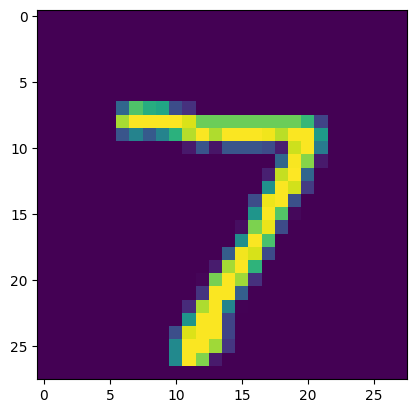

In [136]:
show_image(X_test, y_test, 0)

In [137]:
y_predict = model.predict(X_test)
np.argmax(y_predict[0])

313/313 [==============================] - 0s 946us/step


7

In [138]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [139]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    0,    1,    6,    0,    2,    1],
       [   0, 1121,    4,    0,    0,    1,    4,    0,    5,    0],
       [   5,    1, 1002,    5,    3,    0,    3,    6,    6,    1],
       [   0,    0,    2,  996,    0,    2,    0,    4,    2,    4],
       [   1,    1,    3,    1,  953,    1,    5,    3,    2,   12],
       [   2,    1,    0,   15,    1,  864,    5,    1,    1,    2],
       [   4,    2,    2,    1,    1,    4,  944,    0,    0,    0],
       [   0,    5,    8,    1,    0,    0,    0, 1007,    1,    6],
       [   8,    2,    3,   12,    4,   10,    1,    6,  924,    4],
       [   3,    5,    0,   12,    5,    2,    1,   10,    0,  971]])>

Text(50.722222222222214, 0.5, 'Actual')

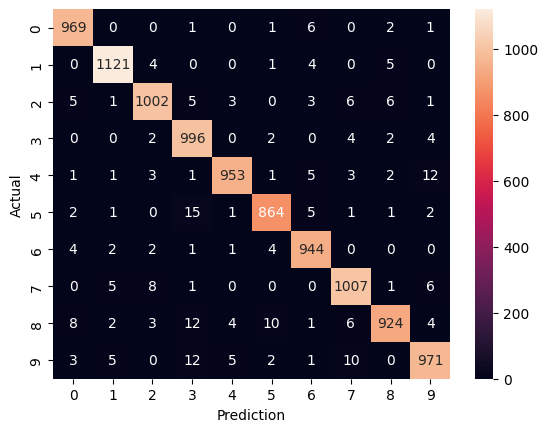

In [140]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')